In [19]:
from keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test) = load_data()


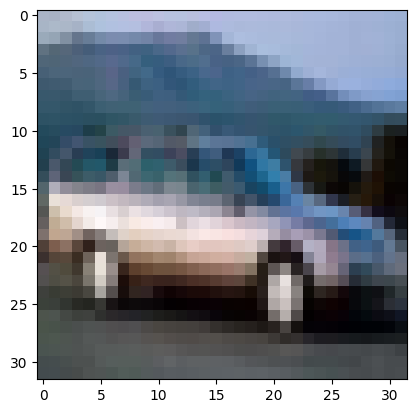

In [2]:
plt.imshow(x_train[4])

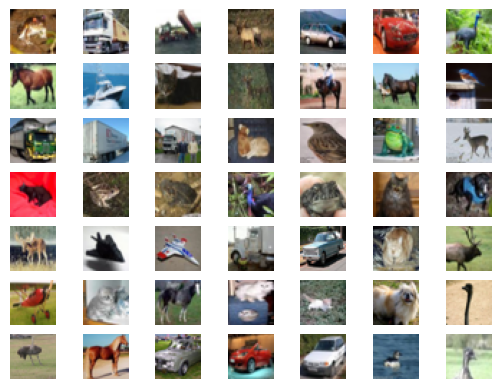

In [3]:
for i in range(49):

  plt.subplot(7,7,1+i)

  plt.axis('off')

  plt.imshow(x_train[i])

plt.show()


In [4]:

x_train.shape

(50000, 32, 32, 3)

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,LeakyReLU,Dropout
from keras.optimizers import Adam
import numpy as np
from keras.utils import plot_model

In [6]:

def descriminator(in_shape = (32,32,3)):

  model = Sequential()

  model.add(Conv2D(64,(3,3),padding= "same" , input_shape = in_shape))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128,(3,3),padding= "same" , strides=(2,2)))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128,(3,3),padding= "same" , strides=(2,2)))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(256,(3,3),padding= "same" , strides=(2,2)))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))

  opt = Adam(lr=0.0002,beta_1=0.5)

  model.compile(optimizer = opt, loss = 'binary_crossentropy',metrics = ['accuracy'])

  return model


In [7]:
model = descriminator()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         2

In [8]:
def load_real_sample():

  (x_train,_),(_,_) = load_data()

  x = x_train.astype('float32')

  x = (x-127.5)/127.5

  return x

In [9]:
x = load_real_sample()
x.shape

(50000, 32, 32, 3)

In [10]:
def generate_real_sample(dataset,n_sample):

  ix = np.random.randint(0,dataset.shape[0],n_sample)

  x = dataset[ix]
  y = np.ones((n_sample,1))

  return x,y


In [11]:
def generate_fake_sample(n_sample):

  x = np.random.rand(32 * 32 * 3 * n_sample)
  x = -1 + x * 2
  x = x.reshape((n_sample,32,32,3))

  y = np.zeros((n_sample,1))

  return x,y

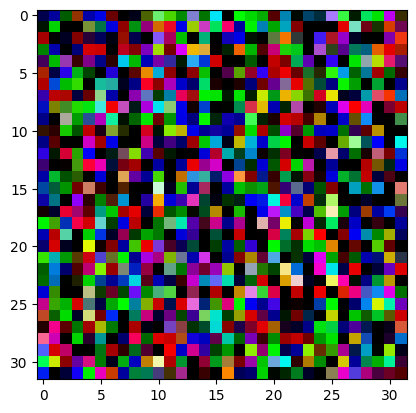

In [12]:
x,y = generate_fake_sample(64)
plt.imshow(x[0])

In [13]:
def train_descriminator(model,dataset,n_iter=20,n_batch=128):

  half_batch = n_batch//2

  for i in range(n_iter):

    x_real,y_real = generate_real_sample(dataset,half_batch)

    _,real_acc = model.train_on_batch(x_real,y_real)

    x_fake,y_fake = generate_fake_sample(half_batch)

    _,fake_acc = model.train_on_batch(x_fake,y_fake)

    print(f'{i+1} . real = {real_acc * 100}% , fake = {fake_acc * 100}% ')


model = descriminator()

dataset = load_real_sample()

train_descriminator(model,dataset)


1 . real = 21.875% , fake = 0.0% 
2 . real = 98.4375% , fake = 0.0% 
3 . real = 92.1875% , fake = 68.75% 
4 . real = 95.3125% , fake = 100.0% 
5 . real = 92.1875% , fake = 100.0% 
6 . real = 98.4375% , fake = 100.0% 
7 . real = 100.0% , fake = 100.0% 
8 . real = 98.4375% , fake = 100.0% 
9 . real = 100.0% , fake = 100.0% 
10 . real = 100.0% , fake = 100.0% 
11 . real = 100.0% , fake = 100.0% 
12 . real = 100.0% , fake = 100.0% 
13 . real = 100.0% , fake = 100.0% 
14 . real = 100.0% , fake = 100.0% 
15 . real = 100.0% , fake = 100.0% 
16 . real = 100.0% , fake = 100.0% 
17 . real = 100.0% , fake = 100.0% 
18 . real = 100.0% , fake = 100.0% 
19 . real = 100.0% , fake = 100.0% 
20 . real = 100.0% , fake = 100.0% 


In [14]:
from keras.models import Sequential
from keras.layers import Dense,Reshape,Conv2D,Conv2DTranspose,LeakyReLU


def generator(latent_dim):

  model = Sequential()

  n_nodes = 256 * 4 * 4

  model.add(Dense(n_nodes,input_dim = latent_dim))
  model.add(LeakyReLU(alpha = 0.2))
  model.add(Reshape((4,4,256)))

  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding = 'same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding = 'same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding = 'same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(3,(3,3),activation='tanh',padding='same'))

  return model


model1 = generator(100)

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 4096)              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 8, 8, 128)         524416    
 anspose)                                                        
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 16, 16, 128)       262272    
 Transpose)                                           

2/2 [==============================] - 0s 95ms/step


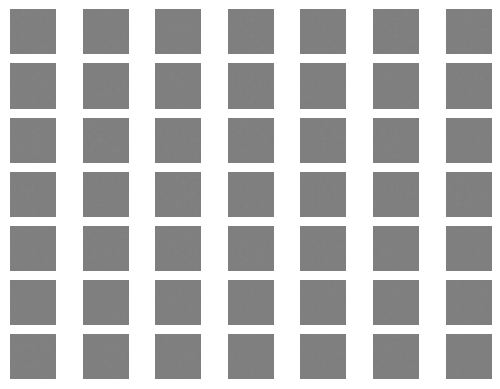

In [15]:
def generate_latent_points(latent_dim,n_sample):

  x_input = np.random.randn(latent_dim * n_sample)
  x_input = x_input.reshape(n_sample,latent_dim)

  return x_input


def generate_fake_sample_by_generator(g_model,latent_dim,n_sample):

  x_input = generate_latent_points(latent_dim,n_sample)

  x = g_model.predict(x_input)

  y = np.zeros((n_sample,1))

  return x,y


model = generator(100)

x,y = generate_fake_sample_by_generator(model,100,49)

x = (x+1)/2.0

for i in range(49):

  plt.subplot(7,7,1+i)

  plt.axis('off')

  plt.imshow(x[i])

plt.show()

In [16]:
def gan(g_model,d_model):

  d_model.trainable = False

  model = Sequential()

  model.add(g_model)

  model.add(d_model)

  opt = Adam(lr = 0.0002,beta_1 = 0.5)

  model.compile(optimizer = opt,loss = 'binary_crossentropy')

  return model


d_model = descriminator()

g_model = generator(100)

model = gan(g_model,d_model)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 32, 32, 3)         1466115   
                                                                 
 sequential_4 (Sequential)   (None, 1)                 522497    
                                                                 
Total params: 1988612 (7.59 MB)
Trainable params: 1466115 (5.59 MB)
Non-trainable params: 522497 (1.99 MB)
_________________________________________________________________


In [17]:
def train(g_model,d_model,gan_model,dataset,latent_dim,n_epochs=20,n_batch=128):

  batch_per_epoch = dataset.shape[0]//n_batch
  half_batch = n_batch//2

  for i in range(n_epochs):
    for j in range(batch_per_epoch):

      x_real,y_real = generate_real_sample(dataset,half_batch)

      d_loss1,_ = d_model.train_on_batch(x_real,y_real)

      x_fake,y_fake = generate_fake_sample_by_generator(g_model,latent_dim,half_batch)

      d_loss2,_ = d_model.train_on_batch(x_fake,y_fake)

      x_gan = generate_latent_points(latent_dim,n_batch)

      y_gan = np.ones((n_batch,1))

      g_loss = gan_model.train_on_batch(x_gan,y_gan)

      print(f'{i+1}. {j+1}/{batch_per_epoch} : d1 = {d_loss1} , d2 = {d_loss2} , g = {g_loss}')

    if (i+1)%10 == 0:
      summerize_function(i,g_model,d_model,dataset,latent_dim)



def summerize_function(i,g_model,d_model,dataset,latent_dim,n_samples = 150):

  x_real,y_real = generate_real_sample(dataset,n_samples)

  _,acc_real = d_model.evaluate(x_real,y_real)

  x_fake,y_fake = generate_fake_sample_by_generator(g_model,latent_dim,n_samples)

  _,acc_fake = d_model.evaluate(x_fake,y_fake)

  print(f'Descriminator Accuracy: Real = {acc_real} , Fake = {acc_fake}')

  save_plot(x_fake,i)

  filename = 'generator_model_%03d.h5' % (i+1)
  g_model.save(filename)


def save_plot(example,epoch,n=7):

  example = (example + 1)/2.0

  for i in range(n * n):
    plt.subplot(n,n,i+1)

    plt.axis('off')

    plt.imshow(example[i])

  filename = 'generated_plot_e%03d.png' % (epoch+1)

  plt.savefig(filename)
  plt.close()


d_model = descriminator()

g_model = generator(100)

gan_model = gan(g_model,d_model)

In [21]:
# Train GAN
def train_gan(generator, discriminator, gan_model, dataset, latent_dim, n_epochs=200, n_batch=128):
    batch_per_epoch = dataset.shape[0] // n_batch
    half_batch = n_batch // 2
    for i in range(n_epochs):
        for j in range(batch_per_epoch):
            x_real, y_real = generate_real_samples(dataset, half_batch)
            d_loss1, _ = discriminator.train_on_batch(x_real, y_real)
            x_fake, y_fake = generate_fake_samples(generator, latent_dim, half_batch)
            d_loss2, _ = discriminator.train_on_batch(x_fake, y_fake)
            x_gan = generate_latent_points(latent_dim, n_batch)
            y_gan = np.ones((n_batch, 1))
            g_loss = gan_model.train_on_batch(x_gan, y_gan)
            #print(f'{i+1}. {j+1}/{batch_per_epoch}: D1 Loss={d_loss1}, D2 Loss={d_loss2}, G Loss={g_loss}')
        if (i+1)%10 == 0:
            print(f'Epoch {i+1} completed')
            # Optionally, you can call summarize_function here


In [ ]:
train(g_model,d_model,gan_model,dataset,latent_dim=100,n_epochs=200,n_batch=128)

2/2 [==============================] - 0s 175ms/step
1. 1/390 : d1 = 0.6585004329681396 , d2 = 0.4417198598384857 , g = 1.5091354846954346
2/2 [==============================] - 1s 273ms/step
1. 2/390 : d1 = 0.5314009189605713 , d2 = 0.4952646493911743 , g = 1.757891058921814
2/2 [==============================] - 0s 183ms/step
1. 3/390 : d1 = 0.4464808702468872 , d2 = 0.4257906675338745 , g = 1.8575141429901123
2/2 [==============================] - 0s 176ms/step
1. 4/390 : d1 = 0.4683123230934143 , d2 = 0.9582663178443909 , g = 1.9637186527252197
2/2 [==============================] - 1s 276ms/step
1. 5/390 : d1 = 0.7310481667518616 , d2 = 0.3410247564315796 , g = 1.8026889562606812
2/2 [==============================] - 0s 179ms/step
1. 6/390 : d1 = 0.7152986526489258 , d2 = 0.8799625635147095 , g = 1.716507911682129
2/2 [==============================] - 0s 171ms/step
1. 7/390 : d1 = 0.5889222025871277 , d2 = 0.3577539920806885 , g = 1.8599293231964111
2/2 [========================